## Sales dataset

In [1]:
import pandas as pd
import numpy as np

In [39]:
root = 'C:\\Users\\Jose Giner\\OneDrive\\Documentos\\UniversityHack\\Atmira_Pharma_Visualization\\'
ventas = pd.read_csv(root + 'items_ordered_2years.csv')
ventas.head(10)

,num_order,item_id,created_at,product_id,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode
0,ce30c2f02458457e3c7b563a636ae2a1,0916c05c5c3f65f59d813a78ac35c8d2,2018-11-06 16:52:13,86434,1.0,9.3750,15.38,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100
1,ce30c2f02458457e3c7b563a636ae2a1,ff323b39ae36843396d2e53ce549fb10,2018-11-06 16:52:13,87652,1.0,7.0000,15.41,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100
2,ce30c2f02458457e3c7b563a636ae2a1,199916dffc95259f4d2daab6664ca9c0,2018-11-06 16:52:13,2785,1.0,9.1587,12.23,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100
3,83e75d608f11c8163599806420903ab9,8ca334ec2493501139327ce0165a1a84,2018-12-17 12:26:54,13000,5.0,13.7936,15.03,50.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100
4,9b687270d8e7eed9717022af5961a190,ce0a1683c6b1a0248b330344ec592ddf,2017-01-12 14:19:03,41947,1.0,5.5924,7.00,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120
5,9b687270d8e7eed9717022af5961a190,a3751aa0cc44fb1fe2ca81331142e091,2017-01-12 14:19:03,35153,1.0,0.9900,5.74,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120
6,9b687270d8e7eed9717022af5961a190,89cd3dd1fc022c18968123b8ff65ddaf,2017-01-12 14:19:03,5449,1.0,11.1094,16.40,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120
7,9b687270d8e7eed9717022af5961a190,8028a2be7031c0f16a23b5277f6bc16d,2017-01-12 14:19:03,10973,2.0,1.4559,2.47,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120
8,9b687270d8e7eed9717022af5961a190,a80ee1884966b0753a848bf4ca451c73,2017-01-12 14:19:03,13474,1.0,1.5000,1.85,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120
9,9b687270d8e7eed9717022af5961a190,03c99719fe74c002bdc1e8e8b1155b25,2017-01-12 14:19:03,1136,1.0,0.8900,1.33,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120


## Data preparation

In [40]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930960 entries, 0 to 930959
Data columns (total 11 columns):
num_order           930960 non-null object
item_id             930960 non-null object
created_at          930960 non-null object
product_id          930960 non-null int64
qty_ordered         930960 non-null float64
base_cost           928558 non-null float64
price               930960 non-null float64
discount_percent    930960 non-null float64
customer_id         930960 non-null object
city                928050 non-null object
zipcode             928050 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 78.1+ MB


In [41]:
ventas.shape

(930960, 11)

In [42]:
ids = ['item_id','product_id']
time = ['created_at']
numerical = ['qty_ordered','base_cost','price','discount_percent']
categorical = ['customer_id','city','zipcode']

ventas = ventas[ids + time + numerical + categorical]

Checking for duplicates

In [43]:
duplicated = ventas.duplicated()
print(duplicated.sum())

15795


Removing them

In [44]:
ventas.drop_duplicates(inplace = True)
dpl = ventas.duplicated()
dpl.sum() #ya no hay duplicados

0

In [45]:
ventas.shape

(915165, 10)

Checking for missing values

In [46]:
ventas.isnull().sum()

item_id                0
product_id             0
created_at             0
qty_ordered            0
base_cost           2358
price                  0
discount_percent       0
customer_id            0
city                2910
zipcode             2910
dtype: int64

Imputing base cost missing values by training a linear regression model

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

testdf = ventas[numerical][ventas['base_cost'].isnull()==True]
print(testdf.head())
traindf = ventas[numerical][ventas['base_cost'].isnull()==False]
y = traindf['base_cost']
traindf.drop("base_cost",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("base_cost",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['base_cost']= pred

      qty_ordered  base_cost  price  discount_percent
831           1.0        NaN   3.52              10.0
832           1.0        NaN   3.29              10.0
2014          2.0        NaN  22.28               5.0
2127          2.0        NaN   5.74               8.0
2330          1.0        NaN   3.96               7.0


In [48]:
testdf.head()

,qty_ordered,price,discount_percent,base_cost
831,1.0,3.52,10.0,3.258034
832,1.0,3.29,10.0,3.095466
2014,2.0,22.28,5.0,16.621135
2127,2.0,5.74,8.0,4.831816
2330,1.0,3.96,7.0,3.667641


Filling missing costs with predicted values

In [49]:
ventas['base_cost'] = ventas['base_cost'].fillna(testdf['base_cost'])
ventas.isnull().sum()

item_id                0
product_id             0
created_at             0
qty_ordered            0
base_cost              0
price                  0
discount_percent       0
customer_id            0
city                2910
zipcode             2910
dtype: int64

Creating a special category 'Unknown' for missing cities

In [50]:
ventas['city'] = ventas['city'].fillna('Unknown')
ventas.isnull().sum()

item_id                0
product_id             0
created_at             0
qty_ordered            0
base_cost              0
price                  0
discount_percent       0
customer_id            0
city                   0
zipcode             2910
dtype: int64

## Exploratory analysis over numerical attributes

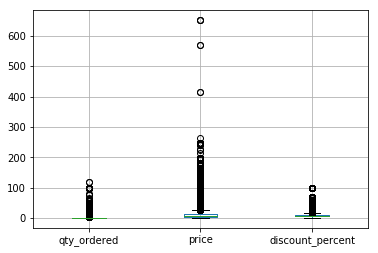

In [15]:
ventas.boxplot(column = [numerical[0]] + numerical[2:])

Checking for the most expensive products

In [20]:
ventas[ventas.price > 400]

,item_id,product_id,created_at,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode
508529,42be1f10caa96a93de6b96826ee2930d,48394,2018-11-02 00:29:05,1.0,0.00,413.64,8.0,277a0e6bd175d03435729e941bea0e64,Meco,28880
508533,182b7f5fb6c8b0049681013bf3a0daaa,48394,2018-11-02 00:34:03,1.0,0.00,413.64,8.0,277a0e6bd175d03435729e941bea0e64,Meco,28880
709334,e17ad424a389c4e5941ff9115bc92462,44576,2017-12-19 11:54:07,1.0,406.00,570.24,5.0,e36e279c6643754a2209caa5fd2b779f,Barcelona,08016
709335,e17ad424a389c4e5941ff9115bc92462,44576,2017-12-19 11:54:07,1.0,406.00,570.24,5.0,e36e279c6643754a2209caa5fd2b779f,El Prat de Llobregat,08820
771368,c192bcd43afa513b67c33ca4cb4652c1,69091,2018-04-21 07:01:18,1.0,366.52,650.83,5.0,64a047b6016aaf3018e74c8888c8cf47,Prado del rey,11660
771370,9442d9a3800eef2dc986c5e509608093,69091,2018-04-21 09:40:10,1.0,366.52,650.83,5.0,64a047b6016aaf3018e74c8888c8cf47,Prado del rey,11660
771371,b564192b7b854befd94e1910c1d38310,69091,2018-04-21 09:42:47,1.0,366.52,650.83,5.0,64a047b6016aaf3018e74c8888c8cf47,Prado del rey,11660


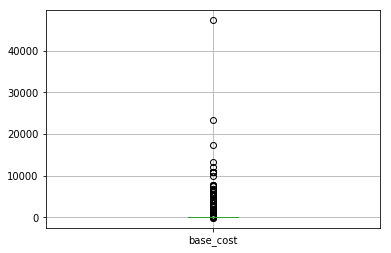

In [20]:
ventas.boxplot(column = numerical[1])

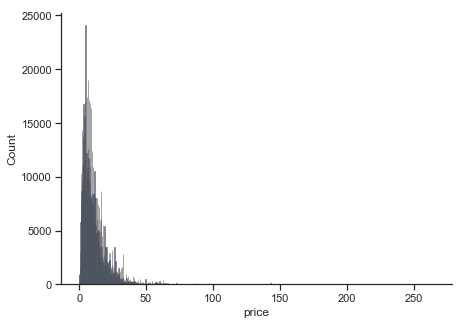

In [21]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    ventas,
    x="price",
    edgecolor=".3",
    linewidth=.5,

)


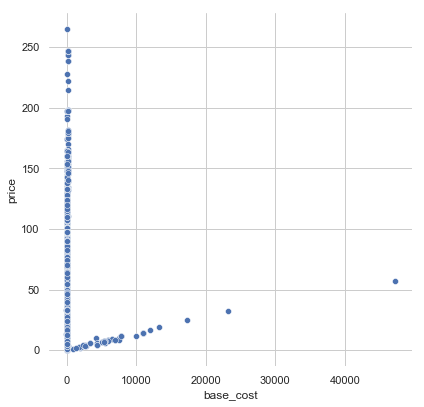

In [23]:
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="base_cost", y="price",
                data=ventas, ax=ax)

## Products dataset

First we read the products file

In [62]:
productos = pd.read_csv(root + 'products.csv')
productos.drop(['short_description','picture'], axis=1, inplace=True)
productos.head(10)

,product_id,sku,name,marca_value,analytic_category
0,7349,165774,Pañales CHELINO LOVE Talla3 4-10 KG 36unidades,Chelino,Infantil
1,7347,165776,Pañales CHELINO LOVE Talla5 13-18 KG 30unidades,Chelino,Infantil
2,50282,230154,Pañales Pingo Maxi T4 40 uds,Pingo,Infantil
3,7348,165775,Pañales CHELINO LOVE Talla4 9-15 KG 34unidades,Chelino,Infantil
4,24517,011905,Dodot Pañal T4 9-15Kg 30unds,Dodot,NaN
5,11938,011896,Dodot Activity T3 De 4 A 10 Kg 56 Unidades,Dodot,NaN
6,13109,011894,Dodot Pañal Sensitive T1 2-5Kg 30Unds,Dodot,NaN
7,60743,183816,Cumlaude Sunlaude Niños Ultrafluido Mineral SP...,Rilastil,Cosmética y Belleza
8,50297,230130,Pañales Pingo Midi T3 44 uds,Pingo,Infantil
9,40669,717200,Chicco Pañales Dry Fit Midi 4-9 kg 21uds,Chicco,Infantil


Check for null values

In [63]:
productos.isnull().sum()

product_id              0
sku                     0
name                   14
marca_value            32
analytic_category    3537
dtype: int64

See unique products on both sales and products dataframes

In [64]:
print(len(ventas['product_id'].unique()))
print(len(productos['product_id'].unique()))

26396
23183


Removing duplicate product ids on products dataframe

In [66]:
productos = productos.drop_duplicates(subset='product_id', keep="first")
len(productos)

23183

Merging sales and products dataframes by product_id column

In [104]:
ventas_productos = pd.merge(ventas, productos, how='left', on = 'product_id')
ventas_productos.head(30)

,item_id,product_id,created_at,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode,sku,name,marca_value,analytic_category
0,0916c05c5c3f65f59d813a78ac35c8d2,86434,2018-11-06 16:52:13,1.0,9.3750,15.38,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,SN06063,Mincartil Soria Natural 180 Comprimidos de 1 g...,Soria Natural,Herbolario
1,ff323b39ae36843396d2e53ce549fb10,87652,2018-11-06 16:52:13,1.0,7.0000,15.41,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,0901056,Colágeno con Silicio y Ácido Hialurónico Binat...,Binature,NaN
2,199916dffc95259f4d2daab6664ca9c0,2785,2018-11-06 16:52:13,1.0,9.1587,12.23,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,248302,Martiderm Proteoglicanos 10 Ampollas,Martiderm,Cosmética y Belleza
3,8ca334ec2493501139327ce0165a1a84,13000,2018-12-17 12:26:54,5.0,13.7936,15.03,50.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,396879.pack,Supradyn Activo PACK 90 Comprimidos + 30 Compr...,Supradyn,Nutrición
4,ce0a1683c6b1a0248b330344ec592ddf,41947,2017-01-12 14:19:03,1.0,5.5924,7.00,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,178963,Aquilea Colageno + Magnesio 240 Comprimidos,Aquilea,Herbolario
5,a3751aa0cc44fb1fe2ca81331142e091,35153,2017-01-12 14:19:03,1.0,0.9900,5.74,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,MF010012,Crema Pies y Talones Fórmula Nutritiva Mifarma...,Mifarma Daily,NaN
6,89cd3dd1fc022c18968123b8ff65ddaf,5449,2017-01-12 14:19:03,1.0,11.1094,16.40,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,327494,Salises Crema Espumosa Sin Jabón 300 ml,Sesderma,Higiene
7,8028a2be7031c0f16a23b5277f6bc16d,10973,2017-01-12 14:19:03,2.0,1.4559,2.47,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,81433169,Oral B pasta 3D White Brillo Seductor 75ml,Oral B,Higiene
8,a80ee1884966b0753a848bf4ca451c73,13474,2017-01-12 14:19:03,1.0,1.5000,1.85,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,233536,PHB Clasicc Cepillo Duro,PHB,Higiene
9,03c99719fe74c002bdc1e8e8b1155b25,1136,2017-01-12 14:19:03,1.0,0.8900,1.33,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,317318,ia Discos Desmaquillantes de Algodón 80 Unidades,InterApothek,Higiene


## Sales visualization

Top selling products

In [73]:
sales_by_productname = ventas_productos.groupby('name').size().sort_values(ascending = False).reset_index()
sales_by_productname.columns = ['name','quantity']
top_sales = sales_by_productname[:20]
top_sales

,name,quantity
0,Dodot Pañal Sensitive T1 2-5Kg 30Unds,2801
1,Pañales CHELINO LOVE Talla3 4-10 KG 36unidades,2725
2,Pañales CHELINO LOVE Talla4 9-15 KG 34unidades,2543
3,Dodot Sensitive Pañal Recien Nacido T2 34uds,2491
4,Fluocaril Duplo Bi Fluore 2 unidades x 125 ml,2188
5,Sesderma C-Vit Liposomal Serum 30 ml,2117
6,Bioderma Sensibio Agua Micelar ROJA 500 ml + 5...,1907
7,NUK Detergente Para Biberones y Tetinas 500ml,1785
8,Pañales CHELINO LOVE Talla2 3-6 KG 28unidades,1591
9,Pañales CHELINO LOVE Talla5 13-18 KG 30unidades,1518


Text(0,0.5,'Quantity sold')

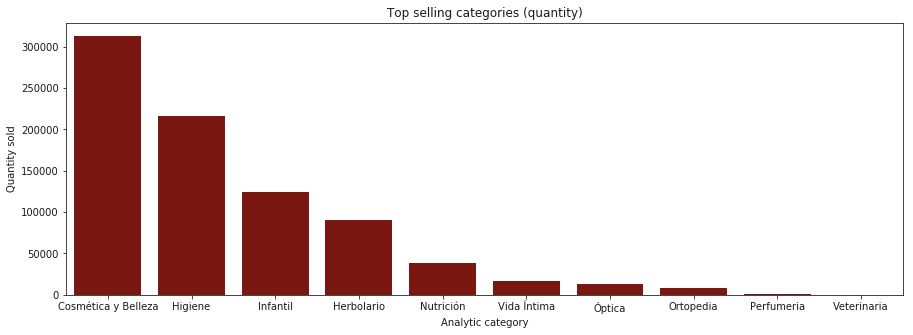

In [105]:
sales_by_category = ventas_productos.groupby('analytic_category').size().sort_values(ascending = False).reset_index()
sales_by_category.columns = ['analytic_category','quantity']

fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Top selling categories (quantity)')
sns.set_color_codes("dark")
sns.barplot(x = "analytic_category", y = "quantity", color = 'r', 
            data=sales_by_category, order=sales_by_category['analytic_category'], ax = ax)

ax.set_xlabel('Analytic category')
ax.set_ylabel('Quantity sold')

Text(0,0.5,'Revenue in Euros')

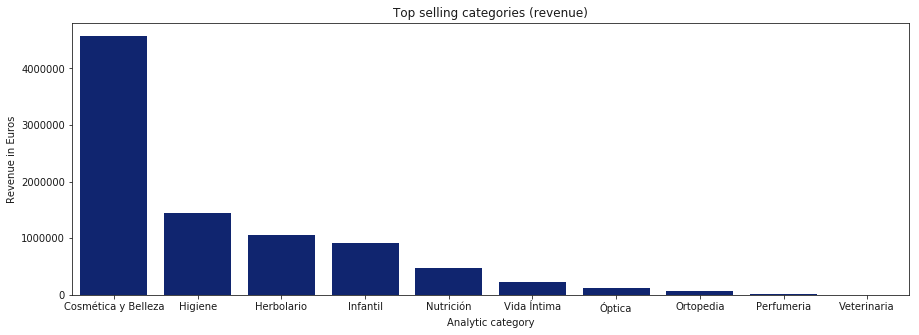

In [102]:
sales_by_category = ventas_productos.groupby('analytic_category').price.sum().sort_values(ascending = False).reset_index()
sales_by_category.columns = ['analytic_category','revenue']


fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Top selling categories (revenue)')
sns.barplot(x = "analytic_category", y = "revenue", color = 'b',
            data=sales_by_category, order=sales_by_category['analytic_category'], ax = ax)

ax.set_xlabel('Analytic category')
ax.set_ylabel('Revenue in Euros')

Text(0,0.5,'Revenue in Euros')

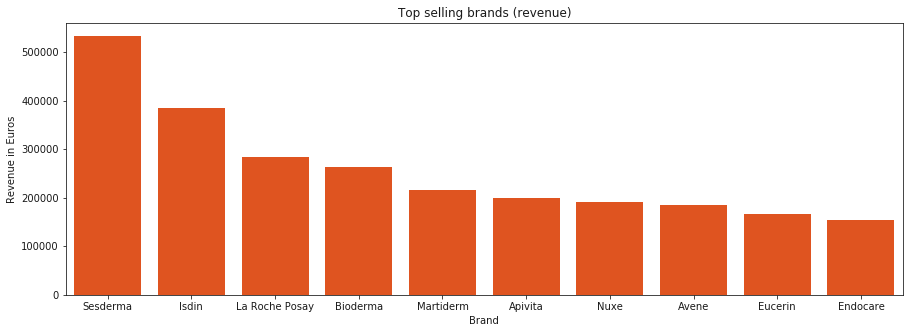

In [110]:
sales_by_brand = ventas_productos.groupby('marca_value').price.sum().sort_values(ascending = False).reset_index()
sales_by_brand.columns = ['brand','revenue']
top_selling_brands = sales_by_brand[:10]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Top selling brands (revenue)')
sns.barplot(x = "brand", y = "revenue", color = 'orangered',
            data=top_selling_brands, order=top_selling_brands['brand'], ax = ax)

ax.set_xlabel('Brand')
ax.set_ylabel('Revenue in Euros')

Text(0,0.5,'Revenue in Euros')

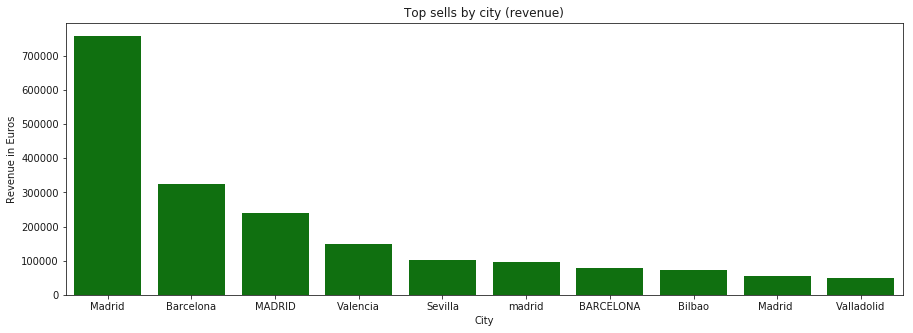

In [111]:
sales_by_city = ventas_productos.groupby('city').price.sum().sort_values(ascending = False).reset_index()
sales_by_city.columns = ['city','revenue']
top_sells_cities = sales_by_city[:10]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Top sells by city (revenue)')
sns.barplot(x = "city", y = "revenue", color = 'green',
            data=top_sells_cities, order=top_sells_cities['city'], ax = ax)

ax.set_xlabel('City')
ax.set_ylabel('Revenue in Euros')